# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\Joe\AppData\Local\Temp\ipykernel_14368\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

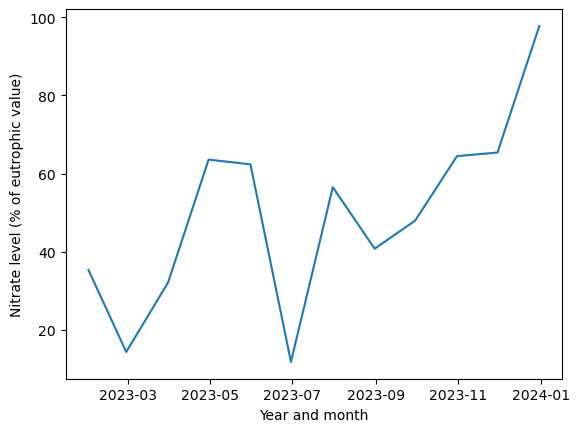

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\Joe\AppData\Local\Temp\ipykernel_14368\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

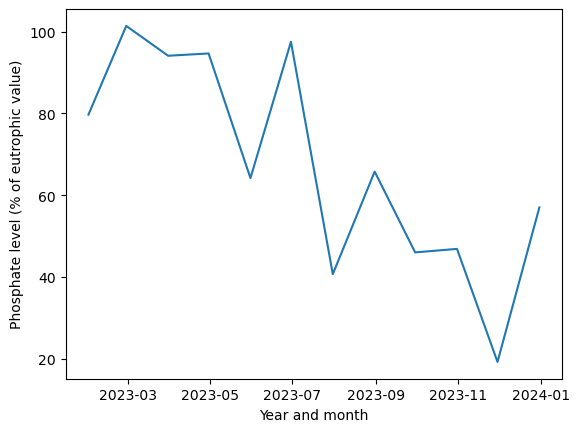

In [4]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

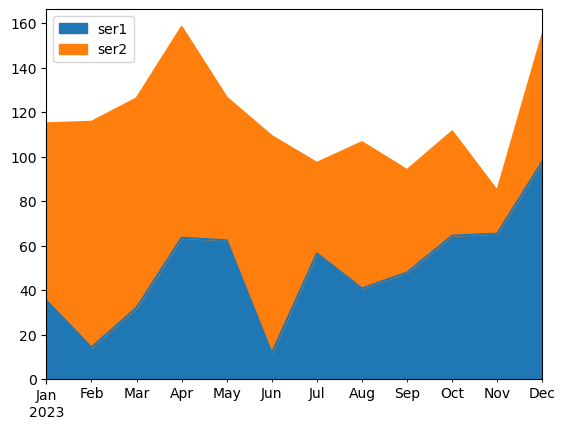

In [5]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

I think overall the area plot is better since it has the advanatge of being more concise, and is able to display the information from both the nitrate as phosphate levels in one graph.  But there are some disadvantages, the main one being if the data is not through the same range of values it can introduce some problems, in addition having the two displayed on one graph can be misleading depending on what the levels for each of them represent, since it is not as percise.  Overall, to change the graph I would scale the Y values if possible and normalize them, and in addition I would also change the labels to be more detailed as well as X, and Y axis titles.  Lastly, I would turn the opacity down on the area charts so it is a bit more readable.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [6]:
insurance_claims = pd.read_csv("./insurance_claims.csv")
insurance_claims = insurance_claims[insurance_claims['collision_type'] != '?']
insurance_claims = insurance_claims[insurance_claims['property_damage'] != '?']
insurance_claims.drop(columns=["_c39"],inplace=True)
insurance_claims

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,550127,2007-07-04,IN,250/500,1000,1248.05,0,443550,...,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
991,257,44,109392,2006-07-12,OH,100/300,1000,1280.88,0,433981,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
992,94,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N


In [7]:
try:
    insurance_claims["policy_bind_date"] = pd.to_datetime(insurance_claims["policy_bind_date"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for Policy bind date or datetime: {e}")

It worked!


In [8]:
try:
    insurance_claims["incident_date"] = pd.to_datetime(insurance_claims["incident_date"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for Policy bind date or datetime: {e}")

It worked!


<Axes: >

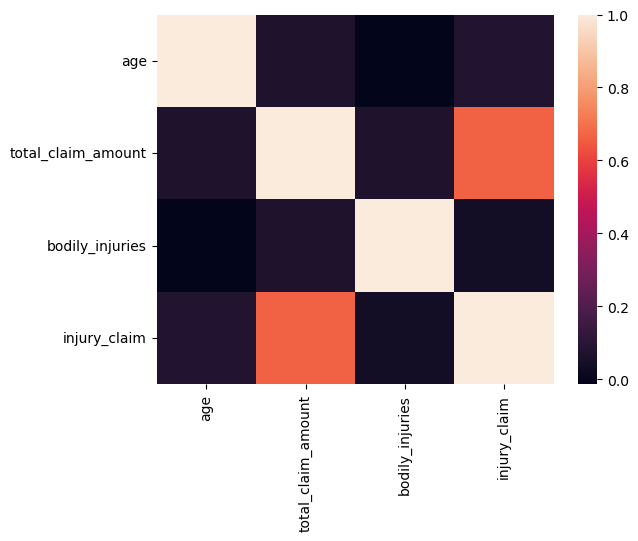

In [9]:
#I am interested in the correlation between a few columns relating to this dataset
insurance_claims_numeric = insurance_claims[["age","total_claim_amount","bodily_injuries", "injury_claim"]]
sns.heatmap(insurance_claims_numeric.corr())
#looks like there are two columns that look like they have a higher correlation than the rest!


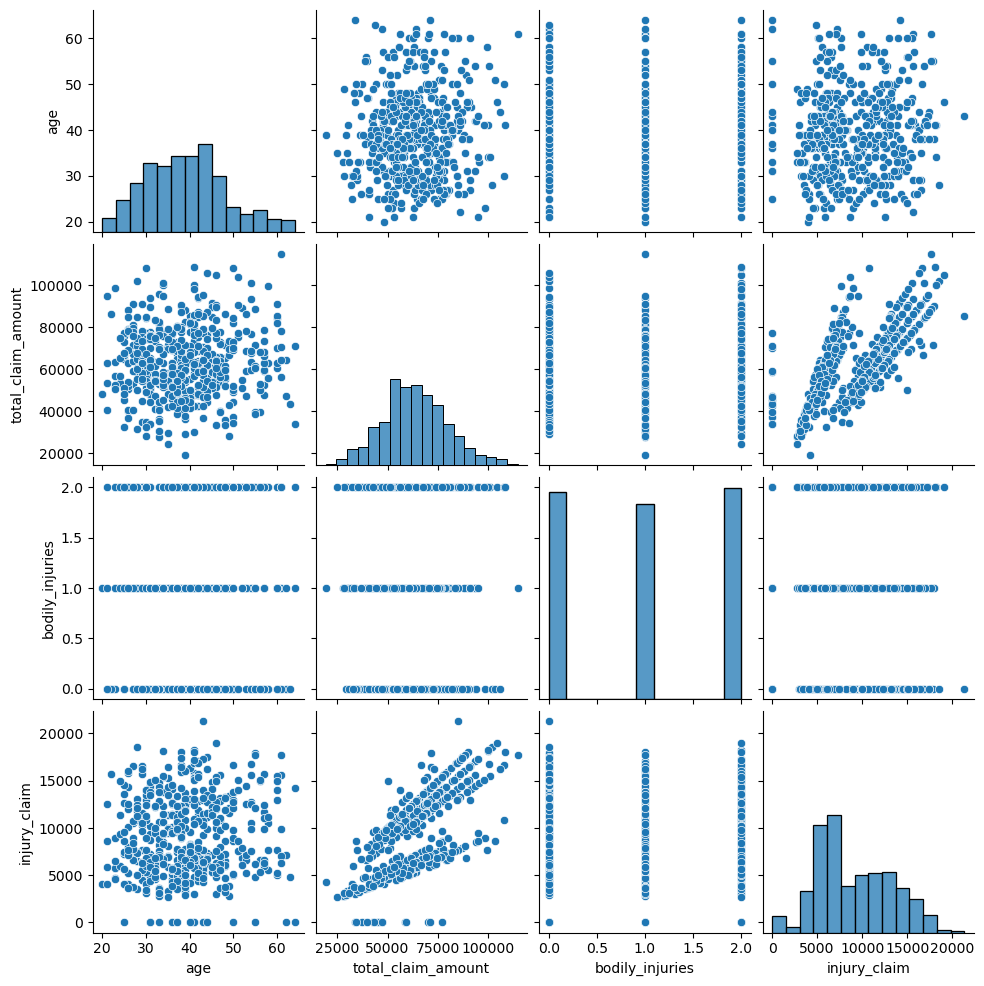

In [10]:
sns.pairplot(insurance_claims_numeric)

Text(0, 0.5, 'Total Claim Amount')

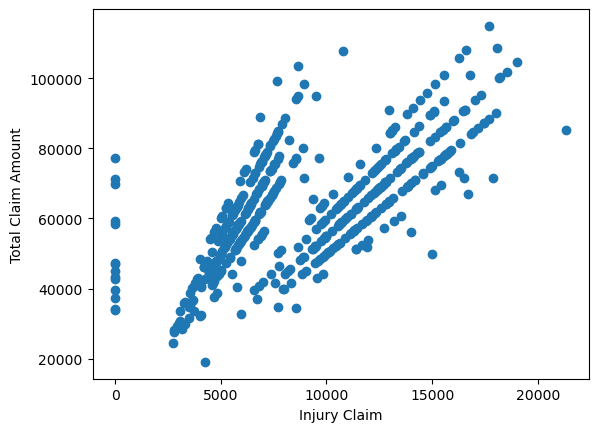

In [11]:
import matplotlib.pyplot as plt
plt.scatter(insurance_claims["injury_claim"], insurance_claims["total_claim_amount"])
plt.xlabel("Injury Claim")
plt.ylabel("Total Claim Amount")

Looks like this correlation is somewhat positive as well, with some outliars when the injury claim is 0.

Now I will be making a histogram of the data over the different date ranges since those had been left out of the pairplots!

<Axes: xlabel='incident_date', ylabel='Count'>

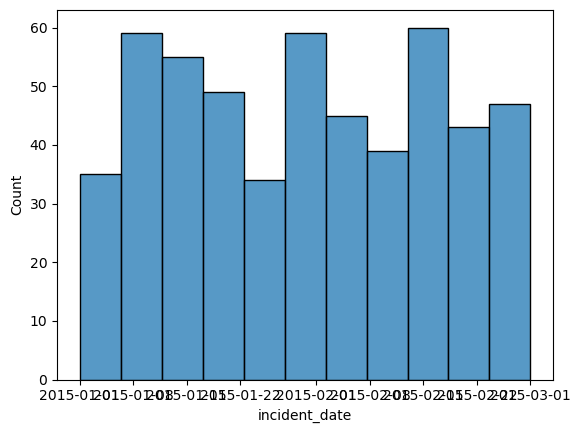

In [12]:
sns.histplot(insurance_claims["incident_date"])
#this looks like a normal distribution

<Axes: xlabel='policy_bind_date', ylabel='Count'>

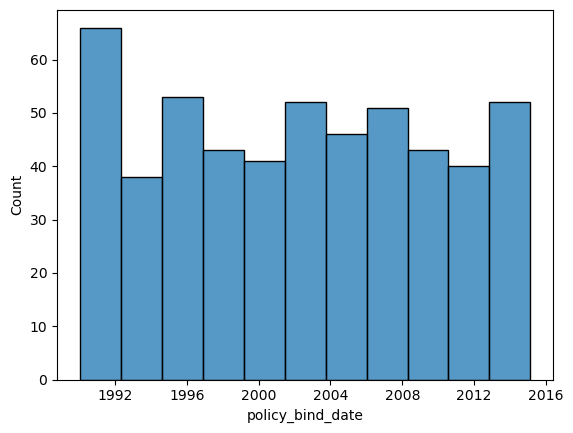

In [13]:
sns.histplot(insurance_claims["policy_bind_date"])

In [56]:
insurance_claims.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [57]:
insurance_claims_numeric.columns

Index(['age', 'total_claim_amount', 'bodily_injuries', 'injury_claim'], dtype='object')

In [78]:
insurance_claims_numeric["policy_deductable"] = insurance_claims["policy_deductable"]
insurance_claims_numeric['auto_year'] = insurance_claims['auto_year']
insurance_claims_numeric['capital-gains']  = insurance_claims['capital-gains']
insurance_claims_numeric['capital-loss'] = insurance_claims['capital-loss']
insurance_claims_numeric['collision_type'] = insurance_claims['collision_type']
insurance_claims_numeric['fraud_reported'] = insurance_claims["fraud_reported"]
def processCollisionType(x):
    if x.lower() == 'side collision':
        return 1
    elif x.lower() == 'front collision':
        return 2
    elif x.lower() == 'rear collision':
        return 3
def processFraudReported(x):
    if x == "Y":
        return 1
    return 0
insurance_claims_numeric['collision_type'] = [processCollisionType(x) for x in insurance_claims_numeric['collision_type'] ]
insurance_claims_numeric['fraud_reported'] = [processFraudReported(x) for x in insurance_claims_numeric['fraud_reported']]
insurance_claims_numeric

C:\Users\Joe\AppData\Local\Temp\ipykernel_14368\463407407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_claims_numeric["policy_deductable"] = insurance_claims["policy_deductable"]
C:\Users\Joe\AppData\Local\Temp\ipykernel_14368\463407407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_claims_numeric['auto_year'] = insurance_claims['auto_year']
C:\Users\Joe\AppData\Local\Temp\ipykernel_14368\463407407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,age,total_claim_amount,bodily_injuries,injury_claim,policy_deductable,auto_year,capital-gains,capital-loss,collision_type,fraud_reported
0,48,71610,1,6510,1000,2004,53300,0,1,1
2,29,34650,2,7700,2000,2007,35100,0,3,0
5,39,64100,0,6410,1000,2003,0,0,3,1
8,33,27700,1,2770,500,2012,0,0,2,0
9,42,42300,2,4700,500,1996,0,-39300,3,0
...,...,...,...,...,...,...,...,...,...,...
989,21,53280,1,5920,1000,2015,37500,-54000,3,0
991,44,46980,0,0,1000,2002,59400,-32200,3,0
992,26,36700,1,3670,500,2010,50300,0,2,0
995,38,87200,0,17440,1000,2006,0,0,2,0


In [79]:
insurance_claims_numeric.to_csv("insurance_claims_numericFE.csv",index=False)

This also looks like a normal distribution

Overall, this had provided some insights that had seemed a bit more intuitive, mainly the strong correlation between the total claim amount and the cost of injuries, which makes intuitive sense considering hospital bills from car accidents can be expensive.  In addition, something that had surprised me was the low correlation between the other features of the data, making car accident claims seem a bit more random than I may have thought.  Lastly, I had expected to see more accidents reported in the winter months of the year since those typically have worse conditions on the road than other months, but was surprised to see a more uniform distribution.

In [25]:
car_claims_dataset = pd.read_csv("./carclaims.csv")

In [47]:
car_claims_dataset.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [26]:
def get_numberic_only(x):
    if " to " in x:
        y = x.split("to")
        q = y[0]
        z = y[1]
        z_numbers = int("".join(filter(str.isdigit,z)))
        q_numbers = int("".join(filter(str.isdigit,q)))
        return (z_numbers + q_numbers) / 2
    else:
        numbers = filter(str.isdigit,x)
        return int("".join(numbers))
vehicle_price_numberic_only = []

for x in car_claims_dataset["VehiclePrice"]:
    vehicle_price_numberic_only.append(get_numberic_only(x))
car_claims_dataset["VehiclePrice"] = vehicle_price_numberic_only
#Changing vehicle price to numeric




In [35]:
car_claims_encoded = pd.get_dummies(car_claims_dataset, columns=["Fault", "AccidentArea", "Make", "VehicleCategory"])
car_claims_encoded.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'PolicyType',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'Fault_Policy Holder', 'Fault_Third Party',
       'AccidentArea_Rural', 'AccidentArea_Urban', 'Make_Accura', 'Make_BMW',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford',
       'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCat

<Axes: >

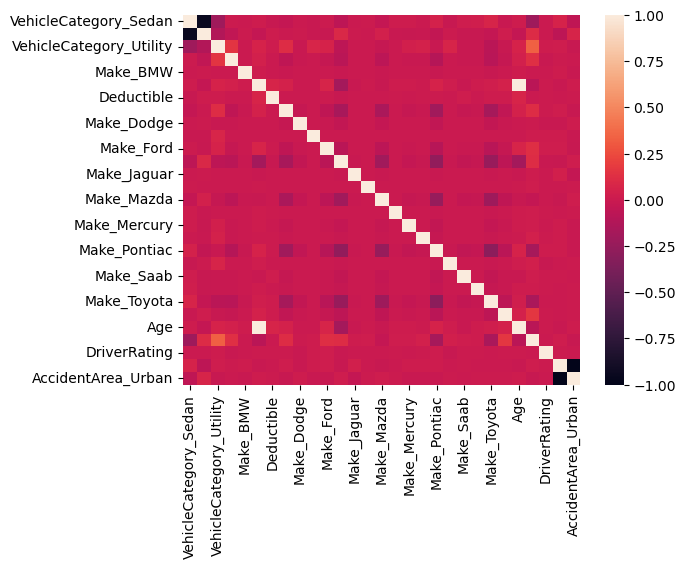

In [38]:
car_claims_numeric = car_claims_encoded[[ 'VehicleCategory_Sedan', 'VehicleCategory_Sport','VehicleCategory_Utility', 'Make_Accura', 'Make_BMW','Age', 'Deductible',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford',
       'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW', 'Age','VehiclePrice','DriverRating','AccidentArea_Rural', 'AccidentArea_Urban']]

sns.heatmap(car_claims_numeric.corr())

There look to be some columns with higher correlations, lets make a pairplot to get a better look.

In [39]:
sns.pairplot(car_claims_numeric)

ValueError: Data must be 1-dimensional, got ndarray of shape (15420, 2) instead

This did not offer much, there's too many columns, I will limit it to more correlated columns based on the heatmap.

In [40]:
corr = car_claims_numeric.corr()
c1 = corr.abs().unstack()
columns_above_60 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.25 and col1 != col2]
a,b = zip(*columns_above_60)
cols = a + b
cols = set(cols)
sns.pairplot(car_claims_numeric[np.array(cols)])

ValueError: Columns with duplicate values are not supported in stack

Interestingly, there does not seem to be a correlation.  I will plot some histograms to see if the vehicle category has any impact on the price

<Axes: xlabel='VehiclePrice', ylabel='Count'>

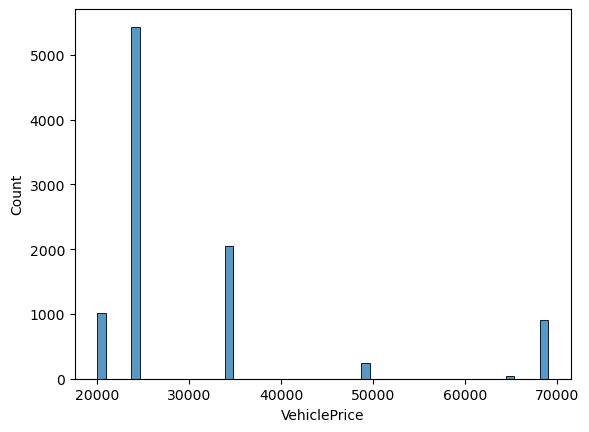

In [41]:
sns.histplot(car_claims_numeric[car_claims_numeric["VehicleCategory_Sedan"]==True]["VehiclePrice"])

looks like there might be a slight correlation, but nothing major of note.

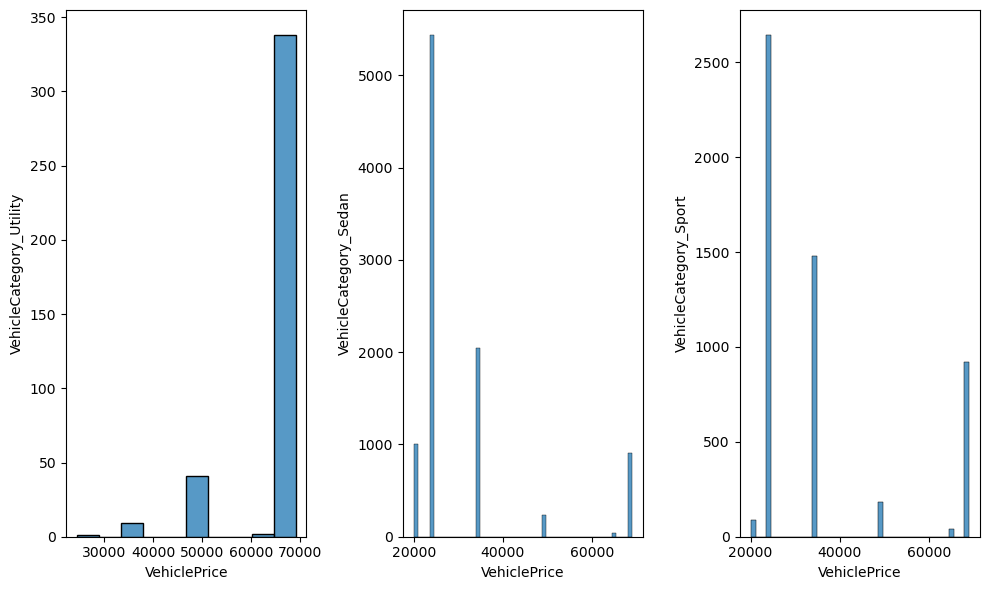

In [42]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.histplot(car_claims_numeric[car_claims_numeric["VehicleCategory_Utility"]==True]["VehiclePrice"])
plt.ylabel("VehicleCategory_Utility")
plt.subplot(1,3,2)
sns.histplot(car_claims_numeric[car_claims_numeric["VehicleCategory_Sedan"]==True]["VehiclePrice"])
plt.ylabel("VehicleCategory_Sedan")
plt.subplot(1,3,3)
sns.histplot(car_claims_numeric[car_claims_numeric["VehicleCategory_Sport"]==True]["VehiclePrice"])
plt.ylabel("VehicleCategory_Sport")
plt.tight_layout()

Text(0, 0.5, 'VehicleCategory_Sport')

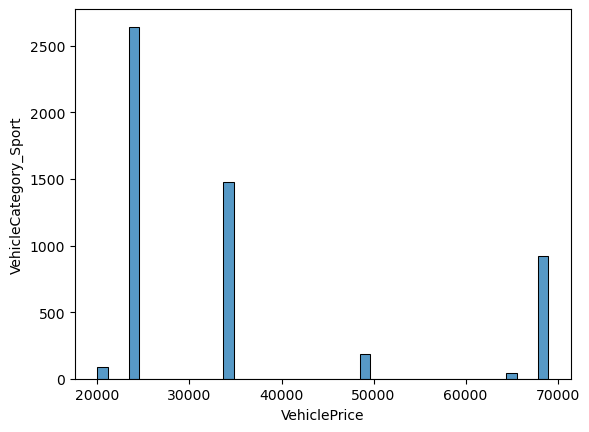

In [43]:
sns.histplot(car_claims_numeric[car_claims_numeric["VehicleCategory_Sport"]==True]["VehiclePrice"])
plt.ylabel("VehicleCategory_Sport")

Text(0, 0.5, 'VehicleCategory_Sedan')

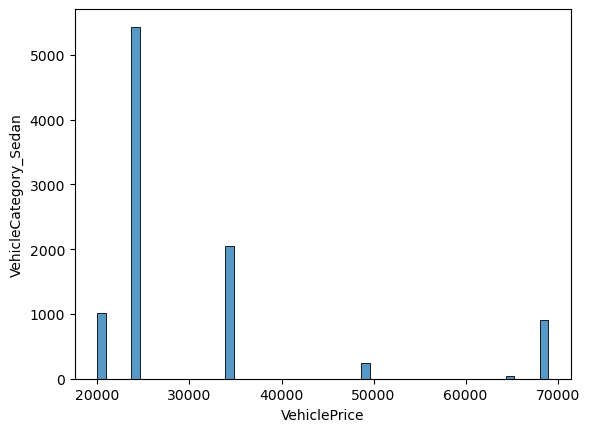

In [44]:
sns.histplot(car_claims_numeric[car_claims_numeric["VehicleCategory_Sedan"]==True]["VehiclePrice"])
plt.ylabel("VehicleCategory_Sedan")

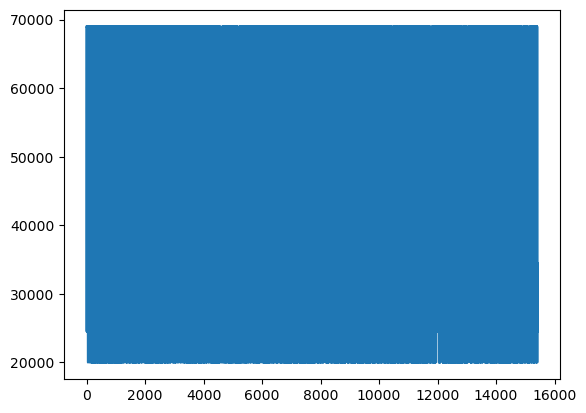

In [ ]:
plt.plot(car_claims_numeric["VehiclePrice"])

In [54]:
car_claims_numeric["FraudFound"] = car_claims_encoded["FraudFound"]
def yesorno(x):
    if x.lower() == 'yes':
        x = 1
    else:
        x = 0
    return x
car_claims_numeric["FraudFound"] = [yesorno(x) for x in car_claims_numeric["FraudFound"]]
car_claims_numeric
car_claims_numeric.to_csv("car_claims_FE.csv",index=False)

The main two things that I had been concerened with had been the accident area as well as the type of vehicle and if that had impacted more claims than not from a certain area, I was surprised to see lower correlations with urban and rural areas as well as something that had also surprised me had been the type of vehicle(unless it was utility) not ahving a huge impact on the price of the vehicle, which leads me to believe these fields may not be useful or may be not counting the types of vehicles properly.

In [69]:
general_fraud_data = pd.read_csv("./insurance_data.csv")
general_fraud_data_auto = general_fraud_data[general_fraud_data["INSURANCE_TYPE"] == "Motor"]
general_fraud_data_auto = pd.get_dummies(general_fraud_data_auto, columns=["SOCIAL_CLASS", "RISK_SEGMENTATION","EMPLOYMENT_STATUS","INCIDENT_SEVERITY"])
general_fraud_data_auto.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1',
       'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'NO_OF_FAMILY_MEMBERS', 'HOUSE_TYPE',
       'ROUTING_NUMBER', 'ACCT_NUMBER', 'CUSTOMER_EDUCATION_LEVEL',
       'CLAIM_STATUS', 'AUTHORITY_CONTACTED', 'ANY_INJURY',
       'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE', 'INCIDENT_CITY',
       'INCIDENT_HOUR_OF_THE_DAY', 'AGENT_ID', 'VENDOR_ID', 'SOCIAL_CLASS_HI',
       'SOCIAL_CLASS_LI', 'SOCIAL_CLASS_MI', 'RISK_SEGMENTATION_H',
       'RISK_SEGMENTATION_L', 'RISK_SEGMENTATION_M', 'EMPLOYMENT_STATUS_N',
       'EMPLOYMENT_STATUS_Y', 'INCIDENT_SEVERITY_Major Loss',
       'INCIDENT_SEVERITY_Minor Loss', 'INCIDENT_SEVERITY_Total Loss'],
      dtype='object')

<Axes: >

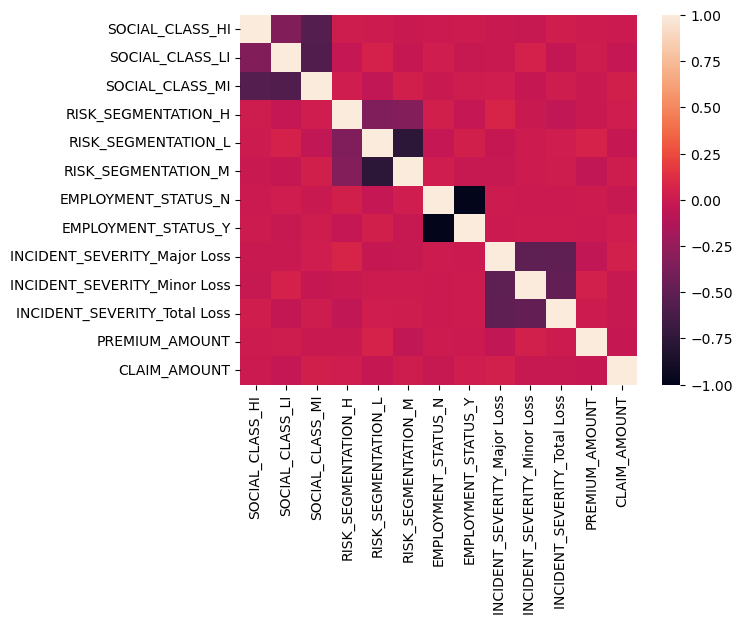

In [71]:
general_fraud_data_auto_numeric = general_fraud_data_auto[['SOCIAL_CLASS_HI', 'SOCIAL_CLASS_LI', 'SOCIAL_CLASS_MI',
       'RISK_SEGMENTATION_H', 'RISK_SEGMENTATION_L', 'RISK_SEGMENTATION_M',
       'EMPLOYMENT_STATUS_N', 'EMPLOYMENT_STATUS_Y','INCIDENT_SEVERITY_Major Loss',
       'INCIDENT_SEVERITY_Minor Loss', 'INCIDENT_SEVERITY_Total Loss','PREMIUM_AMOUNT', 'CLAIM_AMOUNT']]

sns.heatmap(general_fraud_data_auto_numeric.corr())

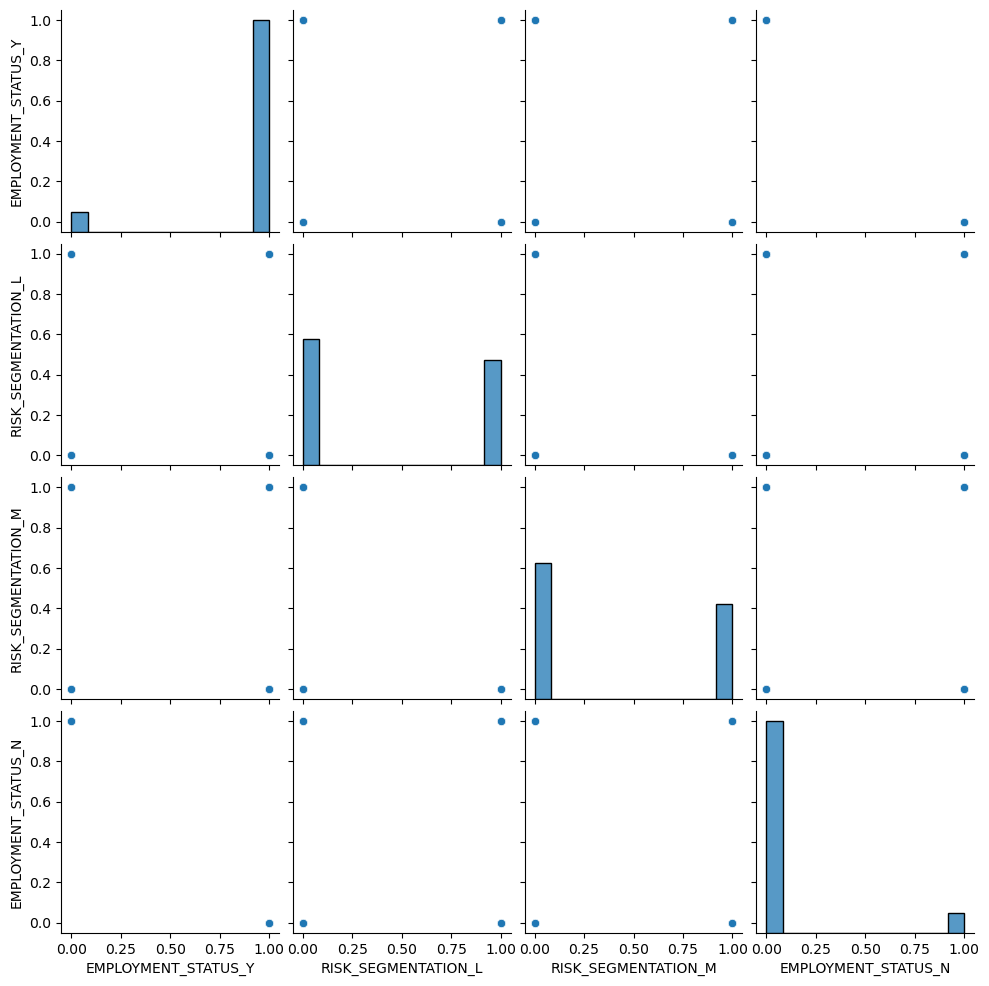

In [ ]:
corr = general_fraud_data_auto_numeric.corr()
c1 = corr.abs().unstack()
columns_above_60 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.7 and col1 != col2]
a,b = zip(*columns_above_60)
cols = a + b
cols = set(cols)
sns.pairplot(general_fraud_data_auto_numeric[np.array(cols)])

I am curious about the risk segmentations as well as employment statuses, since it looks like those have a higher correlation than the social class(relating to income) and for this dataset, being unemployed may be a better indicator for risk segmentation

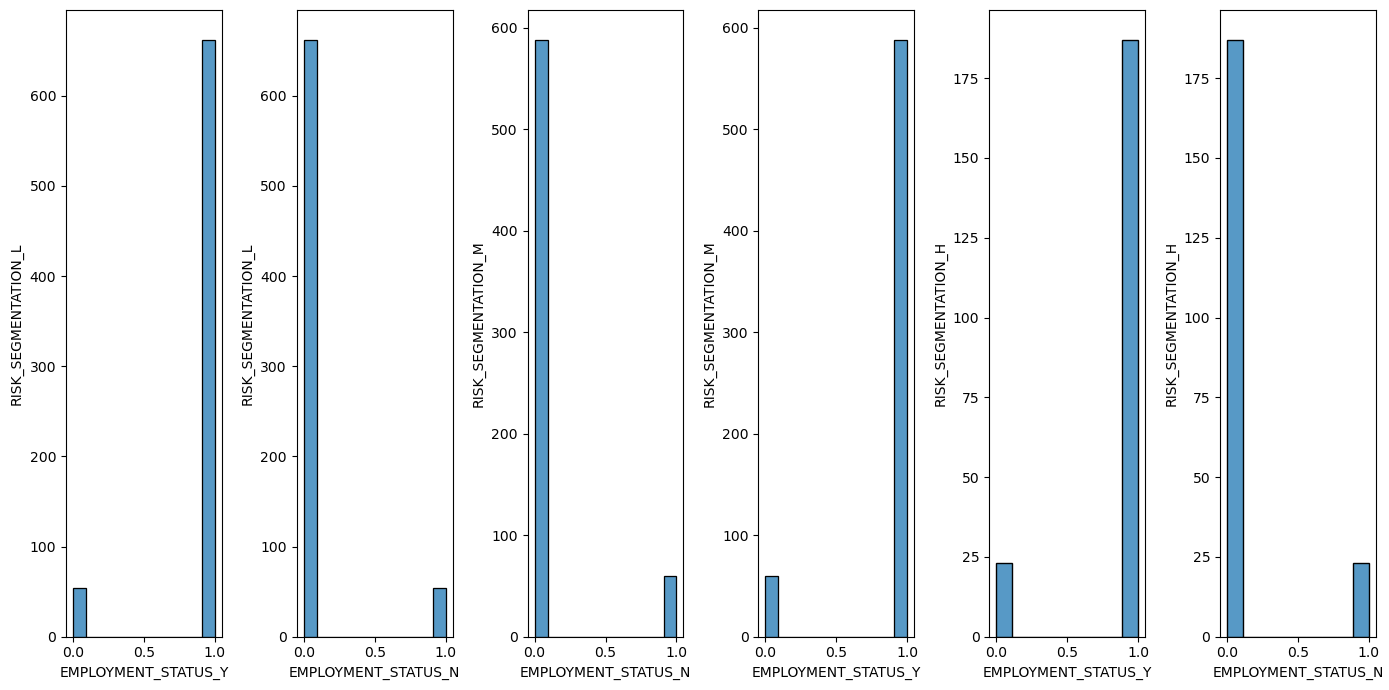

In [ ]:

plt.figure(figsize=(14,7))
plt.subplot(1,6,1)
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_L"]==True]["EMPLOYMENT_STATUS_Y"])
plt.ylabel("RISK_SEGMENTATION_L")
plt.subplot(1,6,2)
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_L"]==True]["EMPLOYMENT_STATUS_N"])
plt.ylabel("RISK_SEGMENTATION_L")
plt.subplot(1,6,3)
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_M"]==True]["EMPLOYMENT_STATUS_N"])
plt.ylabel("RISK_SEGMENTATION_M")
plt.subplot(1,6,4)
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_M"]==True]["EMPLOYMENT_STATUS_Y"])
plt.ylabel("RISK_SEGMENTATION_M")
plt.subplot(1,6,5)
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_H"]==True]["EMPLOYMENT_STATUS_Y"])
plt.ylabel("RISK_SEGMENTATION_H")
plt.subplot(1,6,6)
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_H"]==True]["EMPLOYMENT_STATUS_N"])
plt.ylabel("RISK_SEGMENTATION_H")
plt.tight_layout()

<Axes: xlabel='EMPLOYMENT_STATUS_N', ylabel='Count'>

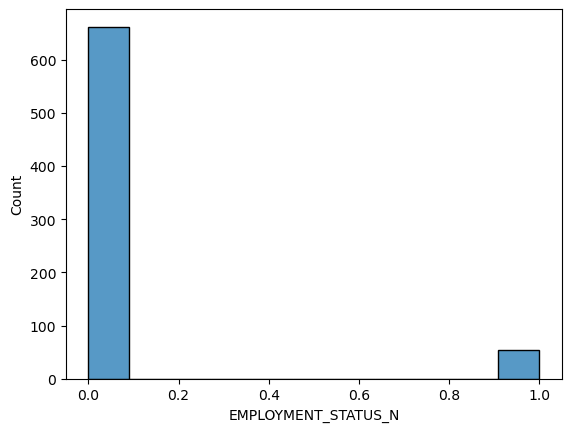

In [ ]:
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_L"]==True]["EMPLOYMENT_STATUS_N"])

<Axes: xlabel='EMPLOYMENT_STATUS_N', ylabel='Count'>

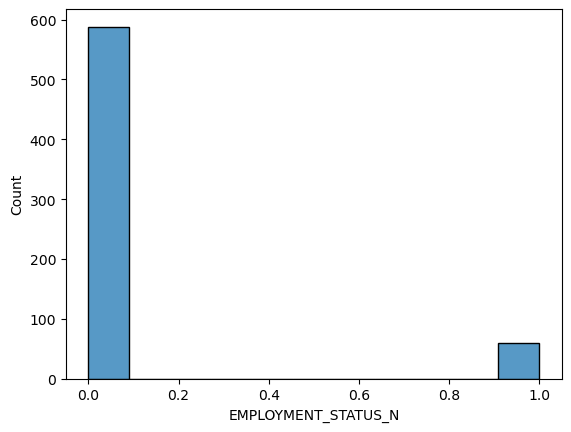

In [ ]:
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_M"]==True]["EMPLOYMENT_STATUS_N"])

<Axes: xlabel='EMPLOYMENT_STATUS_Y', ylabel='Count'>

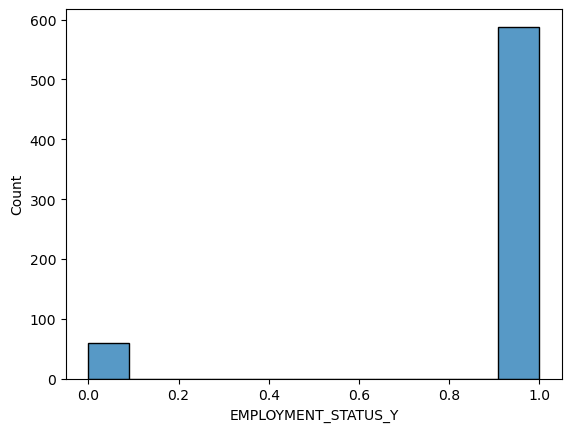

In [ ]:
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_M"]==True]["EMPLOYMENT_STATUS_Y"])

<Axes: xlabel='EMPLOYMENT_STATUS_Y', ylabel='Count'>

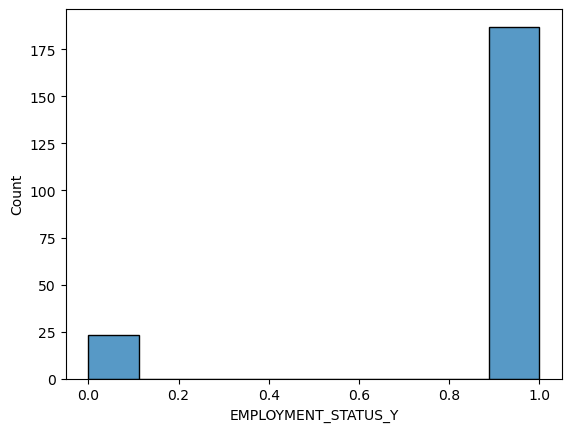

In [ ]:
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_H"]==True]["EMPLOYMENT_STATUS_Y"])

<Axes: xlabel='EMPLOYMENT_STATUS_N', ylabel='Count'>

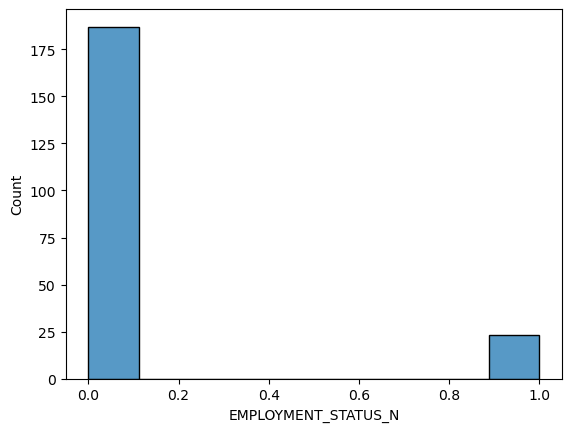

In [ ]:
sns.histplot(general_fraud_data_auto_numeric[general_fraud_data_auto_numeric["RISK_SEGMENTATION_H"]==True]["EMPLOYMENT_STATUS_N"])

In [75]:
general_fraud_data_save = general_fraud_data_auto_numeric.copy()
general_fraud_data_save["RISK_SEGMENTATION"] = general_fraud_data["RISK_SEGMENTATION"]
general_fraud_data_save["INCIDENT_SEVERITY"] = general_fraud_data["INCIDENT_SEVERITY"]
general_fraud_data_save.drop(columns=["RISK_SEGMENTATION_H", "RISK_SEGMENTATION_L", "RISK_SEGMENTATION_M","INCIDENT_SEVERITY_Total Loss", "INCIDENT_SEVERITY_Major Loss", "INCIDENT_SEVERITY_Minor Loss"],inplace=True)
def processRiskSeg(x):
    if x == "H":
        return 3
    elif x == "M":
        return 2
    else:
        return 1

def processIncidentSeverity(x):
    if x == "Total Loss":
        return 3
    elif x == "Major Loss":
        return 2
    else:
        return 1

general_fraud_data_save["RISK_SEGMENTATION"] = [processRiskSeg(x) for x in general_fraud_data_save["RISK_SEGMENTATION"]]
general_fraud_data_save["INCIDENT_SEVERITY"] = [processIncidentSeverity(x) for x in general_fraud_data_save["INCIDENT_SEVERITY"]]
general_fraud_data_save

,SOCIAL_CLASS_HI,SOCIAL_CLASS_LI,SOCIAL_CLASS_MI,EMPLOYMENT_STATUS_N,EMPLOYMENT_STATUS_Y,PREMIUM_AMOUNT,CLAIM_AMOUNT,RISK_SEGMENTATION,INCIDENT_SEVERITY
7,False,False,True,False,True,83.77,8000,1,3
8,False,False,True,False,True,82.14,5000,3,2
11,True,False,False,False,True,101.15,8000,3,2
15,False,True,False,False,True,128.73,9000,1,1
18,False,False,True,False,True,116.55,8000,3,3
...,...,...,...,...,...,...,...,...,...
9975,False,False,True,False,True,134.69,4000,1,3
9980,False,False,True,False,True,70.28,9000,3,1
9990,True,False,False,False,True,121.84,7000,3,1
9995,False,False,True,False,True,105.75,1000,2,1


In [76]:
general_fraud_data_save.to_csv("general_fraud_autoFE.csv",index=False)

It looks like what I had suspected is true, the risk segmentation is pretty correlated with the employment status, I was surprised to see that there had not been a stronger relation regarding the  claim amount and the risk_segmentation as that would seem intuitive

With this dataset I had primarily been concerened with risk segmentation, social class and accident severity, all of the claims in this dataset are fradulent so I was interested to see which fields seemed to have the highest correlation, I was surprised to find only a strong one among risk segmentation as well as employment status, and lower correlations among the other features.  In addition it had looked like being employed was more of an impact on the risk segmentation rather than the social class, in addition there does not seem to be much of a correlation between the risk segmentation and the accident severity like I had thought there would be.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

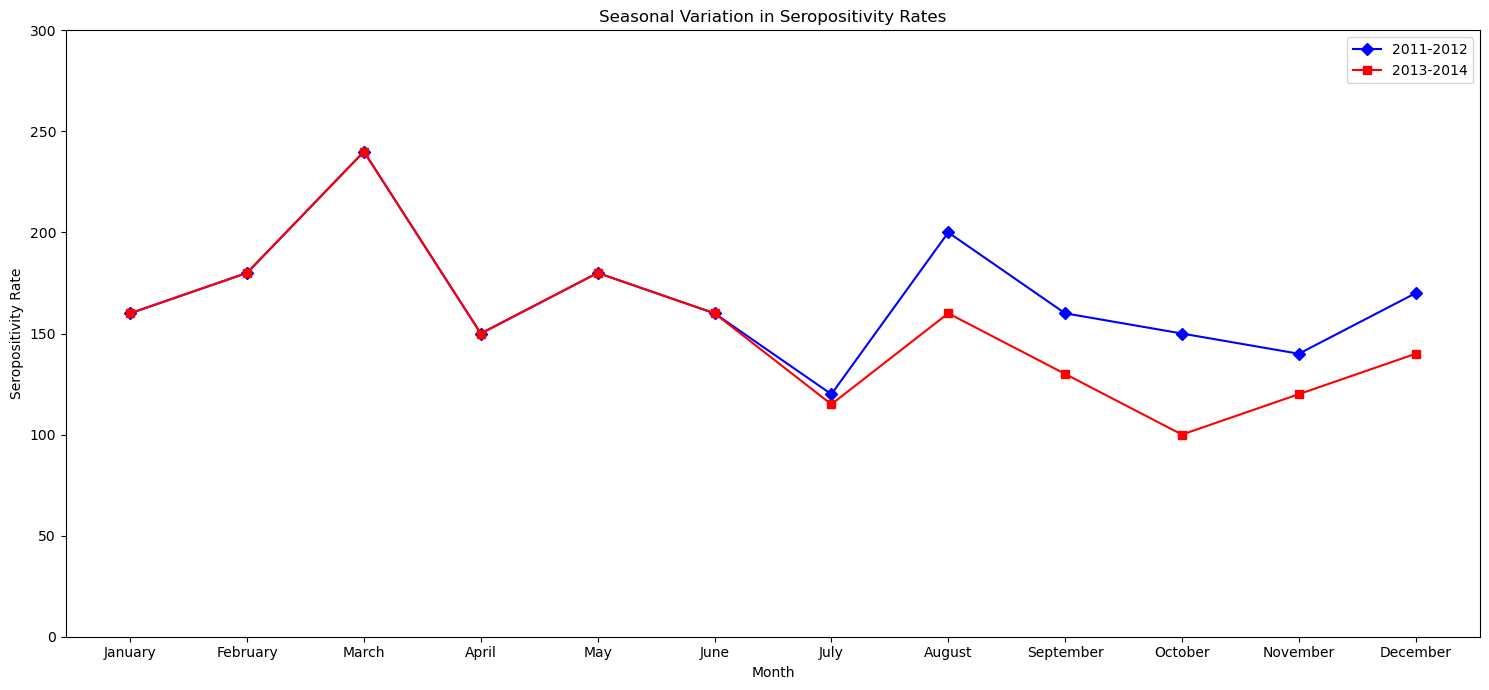

In [ ]:
data_2011_2012 = [160, 180, 240, 150, 180, 160, 120, 200, 160, 150, 140, 170]
data_2013_2014 = [160, 180, 240, 150, 180, 160, 115, 160, 130, 100, 120, 140]
plt.figure(figsize=(15,7))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.plot(months, data_2011_2012, marker='D', linestyle='-', color='blue', label='2011-2012')
plt.plot(months, data_2013_2014, marker='s', linestyle='-', color='red', label='2013-2014')
plt.xlabel('Month')
plt.ylabel('Seropositivity Rate')
plt.title('Seasonal Variation in Seropositivity Rates')
plt.legend()
plt.ylim(0, 300)
plt.tight_layout()

plt.show()